# A sequential LLM app

### 1. Import dependencies

In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama.chat_models import ChatOllama
from typing import TypedDict

In [2]:
# For graphical visualization of the state graph
 
import nest_asyncio
nest_asyncio.apply()
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import Image

### 2. Linking the model

In [3]:
model = ChatOllama(model="gemma:2b")

### 3. Create a state

In [4]:
class LLMState(TypedDict):                      # The LLMState inherits a TypedDict
    question: str
    answer: str

### 4. Define the function for the graph node

In [5]:
def llm_qa(state: LLMState) -> LLMState:
    # Extract the question from the state
    question = state["question"]


    # Form a prompt
    prompt = f"Answer the following question:\n{question}"


    # Ask the question to the model
    answer = model.invoke(prompt).content


    # Update the state with the answer
    state['answer'] = answer

    return state

### 5. Create the graph

In [6]:
# Declare the graph:
graph = StateGraph(LLMState)                    # The StateGraph takes the state as a parameter, signifying that the "state" will be exchanged between the nodes through the edges.

# Add a nodes/states to the graph:
graph.add_node("llm_qa", llm_qa)

# Add edges to the graph:
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

### 6. Compile the graph

In [7]:
workflow = graph.compile()

### 7. Run the code

In [8]:
initial_state = { "question" : "Tell me about Ollama the software" }

final_state = workflow.invoke(initial_state)

print(final_state)


{'question': 'Tell me about Ollama the software', 'answer': "Sure, here's a summary of Ollama software:\n\n**What is Ollama?**\n\nOllama is a software solution that helps people with intellectual and developmental disabilities (IDD) and autism to communicate and socialize more effectively. It uses a variety of tools and technologies to provide a personalized and interactive learning experience.\n\n**Key features of Ollama:**\n\n* **Communication tools:** Ollama offers a range of tools for individuals with IDD and autism to express themselves, including voice, text, and visual communication methods. These tools can be used to communicate both verbally and nonverbally.\n* **Social skills training:** Ollama's social skills training tools focus on teaching individuals how to interact with others in a positive and meaningful way. These tools can help individuals with IDD and autism build social skills, improve their relationships, and reduce challenging behaviors.\n* **Personalized learning

In [9]:
print(final_state["answer"])

Sure, here's a summary of Ollama software:

**What is Ollama?**

Ollama is a software solution that helps people with intellectual and developmental disabilities (IDD) and autism to communicate and socialize more effectively. It uses a variety of tools and technologies to provide a personalized and interactive learning experience.

**Key features of Ollama:**

* **Communication tools:** Ollama offers a range of tools for individuals with IDD and autism to express themselves, including voice, text, and visual communication methods. These tools can be used to communicate both verbally and nonverbally.
* **Social skills training:** Ollama's social skills training tools focus on teaching individuals how to interact with others in a positive and meaningful way. These tools can help individuals with IDD and autism build social skills, improve their relationships, and reduce challenging behaviors.
* **Personalized learning:** Ollama is highly customizable to meet individual needs. The softwar

### 8. Graph

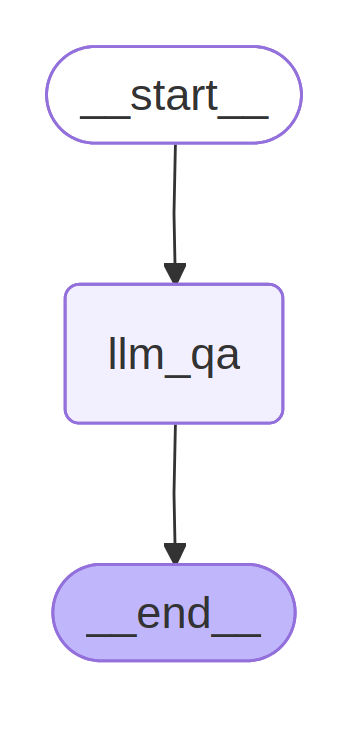

In [10]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER))